Projeto: Regressão Linear Simples (RLS)

Objetivo

Avaliar se a variável idade (age) exerce influência significativa sobre o valor do seguro (charges), identificando a direção e a força dessa relação no Insurance Charges Dataset.

Método aplicado

Utilizou-se Regressão Linear Simples (OLS) para modelar a relação entre idade e custo do seguro. O método estima uma linha de tendência que descreve como alterações na idade impactam o valor do seguro, considerando coeficientes, p-values e R² para avaliar significância e ajuste do modelo.

Dataset

A análise foi conduzida com o Insurance Charges Dataset, composto por informações demográficas e financeiras dos segurados. O estudo concentrou-se nas variáveis age e charges, complementando com visualizações e correlação para apoiar a interpretação dos resultados.

Link Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [3]:
import pandas as pd # manipulação de dados em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
import plotly.graph_objs as go # gráfico 3D
from scipy.stats import pearsonr # correlações de Pearson
from sklearn.preprocessing import LabelEncoder # transformação de dados


In [26]:
# Função Auxiliar
# Verifica se o modelo de regressão é estatisticamente significativo.
def checar_significancia_modelo(modelo, alpha=0.05):
    """
    Parâmetros:
        modelo : objeto de regressão do statsmodels (ex.: OLS.fit())
        alpha  : nível de significância (default = 0.05)

    Retorna:
        str : mensagem indicando se o modelo é significativo.
    """

    p_valor = modelo.f_pvalue  # p-value do teste F

    if p_valor < alpha:
        return f"O modelo é estatisticamente significativo (p-value = {p_valor:.4e})."
    else:
        return f"O modelo NÃO é estatisticamente significativo (p-value = {p_valor:.4e})."

In [4]:
# Importar o banco de dados
    
df = pd.read_csv('bebes.csv', delimiter=',')

In [5]:
#Características das variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comprimento  74 non-null     float64
 1   idade        74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [6]:
#Estatísticas univariadas
df.describe()

,comprimento,idade
count,74.000000,74.000000
mean,66.921622,25.312162
std,12.852386,12.975168
min,31.900000,2.150000
25%,56.470000,12.500000
50%,70.400000,26.000000
75%,75.807500,33.000000
max,87.630000,60.000000


In [7]:
# Análise das 5 primeiras linhas do dataset
df.head()

,comprimento,idade
0,63.07,19.00
1,65.63,21.00
2,65.63,22.50
3,66.73,22.50
4,66.37,23.25


In [8]:
# Análise das 5 ultimas linhas do dataset
df.tail()

,comprimento,idade
69,75.90,30.5
70,78.47,31.0
71,80.67,36.5
72,81.03,38.0
73,78.47,38.5


In [9]:
# Quantidade de Linhas e Coluna
df.shape

(74, 2)

In [10]:
# Formato das variaveis
df.dtypes

comprimento    float64
idade          float64
dtype: object

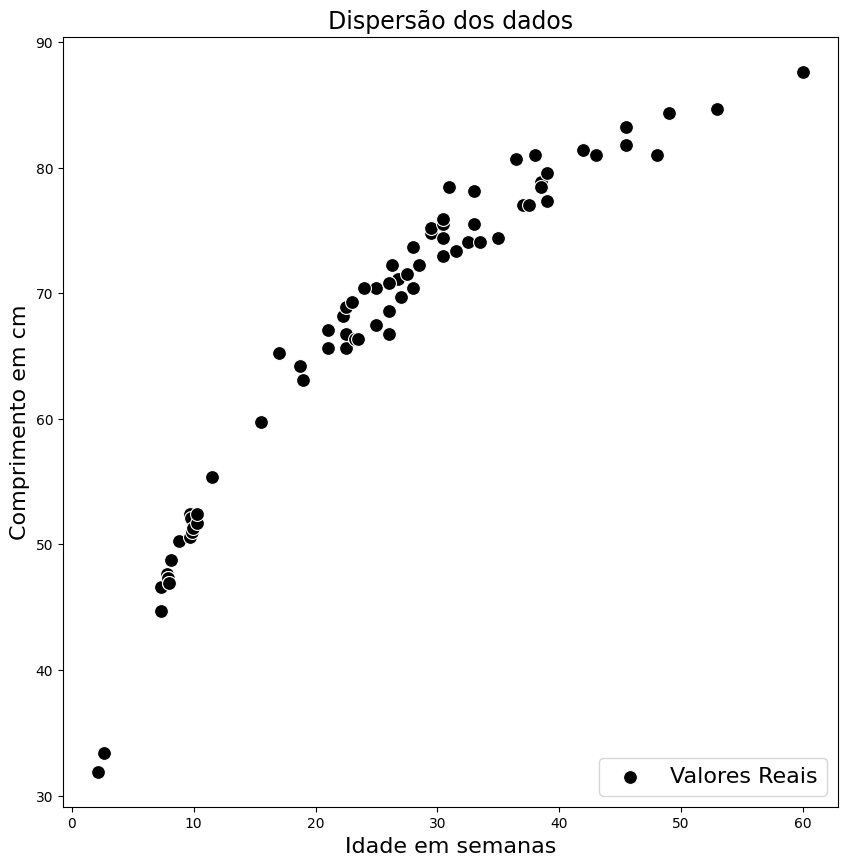

In [12]:
# Gráfico de dispersão

plt.figure(figsize=(10,10))
sns.scatterplot(x="idade", y="comprimento", data=df, color='black',
                s=100, label='Valores Reais')
plt.title('Dispersão dos dados', fontsize=17)
plt.xlabel('Idade em semanas', fontsize=16)
plt.ylabel('Comprimento em cm', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()


In [13]:
# Estimação de um modelo OLS linear
modelo_linear = sm.OLS.from_formula('comprimento ~ idade', df).fit()

# Observar os parâmetros resultantes da estimação
modelo_linear.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            comprimento   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     667.7
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           3.72e-38
Time:                        10:23:17   Log-Likelihood:                -207.26
No. Observations:                  74   AIC:                             418.5
Df Residuals:                      72   BIC:                             423.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.1004      1.034     41.665      0.000      41.038      45.163
idade          0.9411      0.036     25.841      0.000       0.868       1.014
==============================================================================
Omnibus:                       21.203   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.159
Skew:                          -1.218   Prob(JB):                     4.66e-07
Kurtosis:                       4.877   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

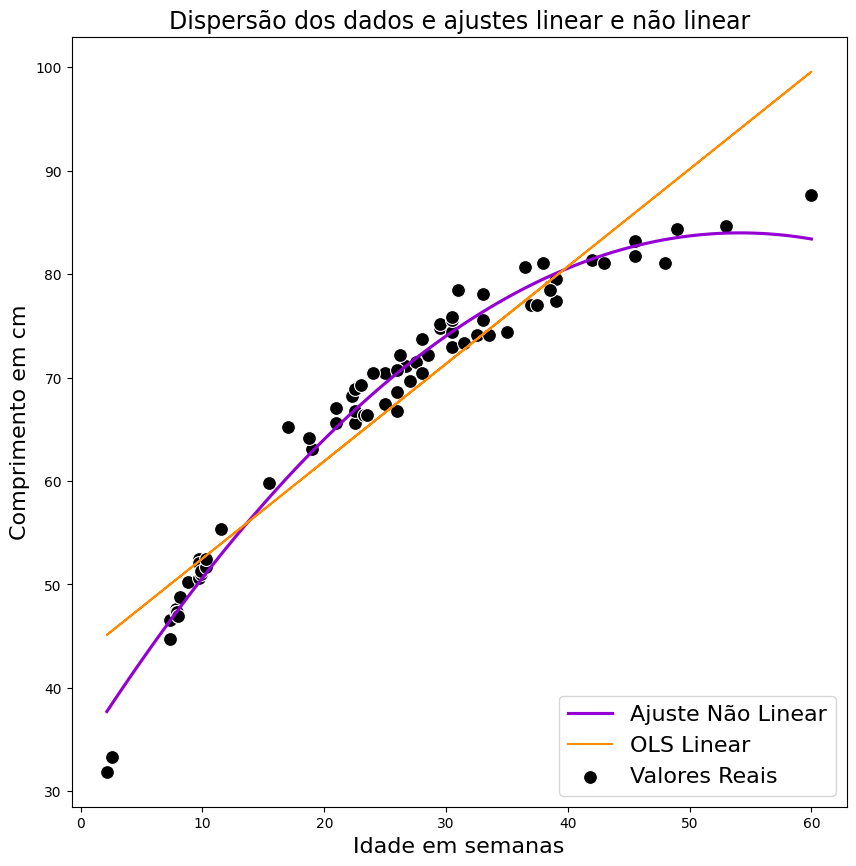

In [16]:
# In[ ]: Gráfico de dispersão com ajustes (fits) linear e não linear

plt.figure(figsize=(10,10))
sns.regplot(x="idade", y="comprimento", data=df, order=2,
            color='darkviolet', ci=False, scatter=False, label='Ajuste Não Linear')
plt.plot(df['idade'], modelo_linear.fittedvalues, color='darkorange',
         label='OLS Linear')
sns.scatterplot(x="idade", y="comprimento", data=df, color='black',
                s=100, label='Valores Reais')
plt.title('Dispersão dos dados e ajustes linear e não linear', fontsize=17)
plt.xlabel('Idade em semanas', fontsize=16)
plt.ylabel('Comprimento em cm', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [17]:
# Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiro_francia' do pacote
#'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/
# pip install statstests
from statstests.tests import shapiro_francia
shapiro_francia(modelo_linear.resid)

# Interpretação
teste_sf = shapiro_francia(modelo_linear.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)

print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9087044262594461
statistics z  :  3.6276504915453733
p-value  :  0.00014300603555437983
method  :  Shapiro-Francia normality test
statistics W  :  0.9087044262594461
statistics z  :  3.6276504915453733
p-value  :  0.00014300603555437983
Statistics W=0.90870, p-value=0.000143
Rejeita-se H0 - Distribuição não aderente à normalidade


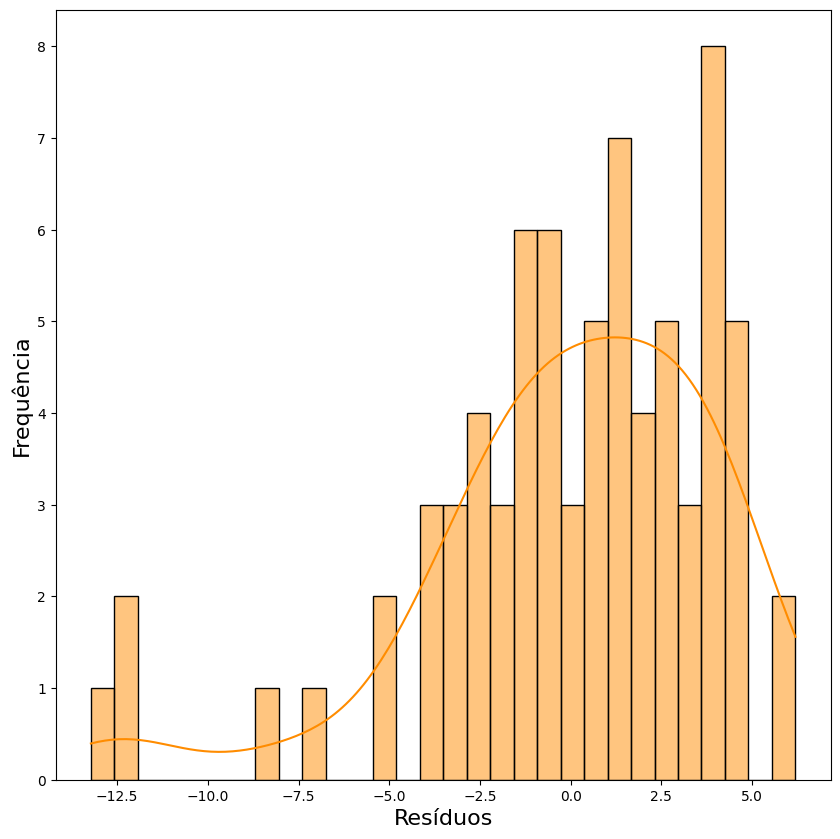

In [ ]:
# Histograma dos resíduos do modelo OLS linear

plt.figure(figsize=(10,10))
sns.histplot(data=modelo_linear.resid, kde=True, bins=30, color = 'darkorange')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()


**Resultado da verificação da aderência dos resíduos:** O resultado da análise gráfica e teste de Shapiro-Francia mostrou que os resíduos não seguem distribuição normal (p < 0.05), indicando violação das premissas do modelo linear. Por isso, será aplicada a transformação Box-Cox para tentar corrigir a assimetria e melhorar o ajuste do modelo.

In [19]:
# Transformação de Box-Cox

# Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#x é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
x, lmbda = boxcox(df['comprimento'])

#Inserindo a variável transformada ('bc_comprimento') no dataset
#para a estimação de um novo modelo
df['bc_comprimento'] = x

df

,comprimento,idade,bc_comprimento
0,63.07,19.00,22966.092606
1,65.63,21.00,25529.075884
2,65.63,22.50,25529.075884
3,66.73,22.50,26682.733457
4,66.37,23.25,26301.668594
...,...,...,...
69,75.90,30.50,37577.506812
70,78.47,31.00,41056.620650
71,80.67,36.50,44189.027404
72,81.03,38.00,44715.337339


In [20]:
# Estimando um novo modelo OLS com variável dependente transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_comprimento ~ idade', df).fit()

#Parâmetros do modelo
modelo_bc.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bc_comprimento   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1822.
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           7.16e-53
Time:                        10:39:27   Log-Likelihood:                -681.77
No. Observations:                  74   AIC:                             1368.
Df Residuals:                      72   BIC:                             1372.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4995.1615    630.253      7.926      0.000    3738.775    6251.548
idade        947.2302     22.189     42.689      0.000     902.997     991.463
==============================================================================
Omnibus:                        1.140   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.557
Skew:                           0.098   Prob(JB):                        0.757
Kurtosis:                       3.377   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Verificando a normalidade dos resíduos do 'modelo_bc'

# Teste de Shapiro-Francia
shapiro_francia(modelo_bc.resid)

# Interpretação
teste_sf = shapiro_francia(modelo_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')


method  :  Shapiro-Francia normality test
statistics W  :  0.9729952064687972
statistics z  :  1.2666154523891044
p-value  :  0.10264641223383941
method  :  Shapiro-Francia normality test
statistics W  :  0.9729952064687972
statistics z  :  1.2666154523891044
p-value  :  0.10264641223383941
Statistics W=0.97300, p-value=0.102646
Não se rejeita H0 - Distribuição aderente à normalidade


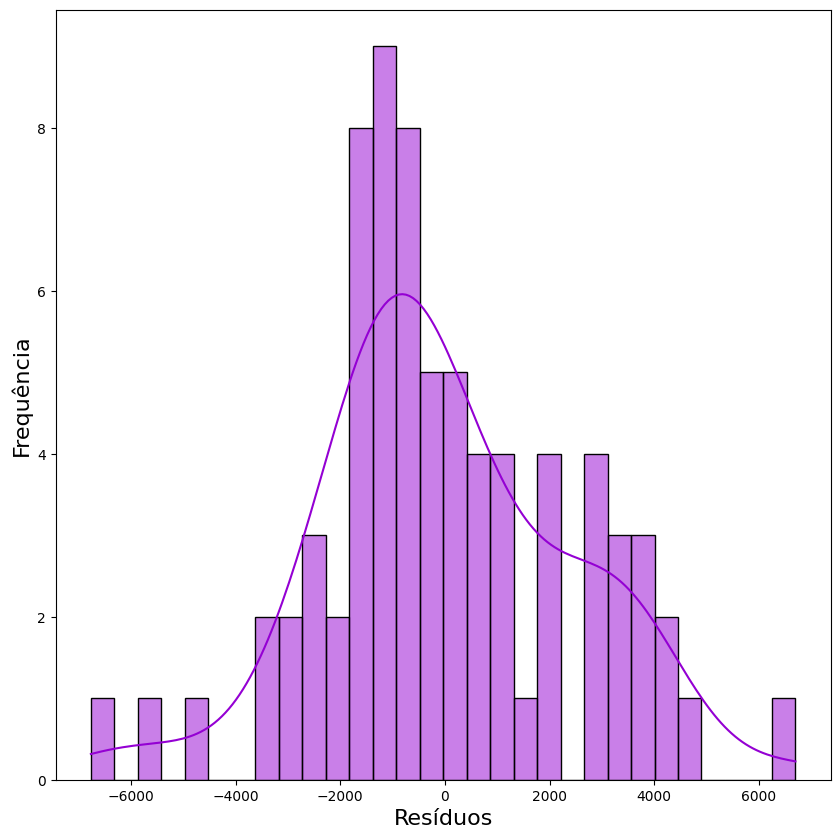

In [22]:
# Histograma dos resíduos do modelo_bc

plt.figure(figsize=(10,10))
sns.histplot(data=modelo_bc.resid, kde=True, bins=30, color='darkviolet')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()


**Resultado da Transformação Box-Cox:** Após aplicar a transformação Box-Cox, o teste de Shapiro-Francia indicou que os resíduos passaram a atender à normalidade (p > 0.05). Portanto, não se rejeita H0, mostrando que a transformação foi eficaz em corrigir a distribuição dos resíduos e melhorar o ajuste do modelo.

In [ ]:
# Verifica se o modelo de regressão é estatisticamente significativo:
checar_significancia_modelo(modelo_bc)

'O modelo é estatisticamente significativo (p-value = 7.1629e-53).'

**Resultado:** O modelo ajustado após a transformação Box-Cox apresentou um p-valor extremamente baixo (7.1629e-53), indicando que ele é estatisticamente significativo no nível de 5%. Isso significa que, de forma conjunta, as variáveis do modelo explicam de maneira consistente a variação da variável resposta, validando a adequação do modelo transformado para fins de análise e predição.

In [28]:
# Fazendo predições em modelos OLS
# Modelo Não Linear (Box-Cox):
# Qual seria o cumprimento, em média, para um bebê de 52 semanas?
resultado = modelo_bc.predict(pd.DataFrame({'idade':[52]}))

# Não podemos nos esquecer de fazer o cálculo inverso para a obtenção do fitted
#value de Y (variável 'comprimento')
(resultado * lmbda + 1) ** (1 / lmbda)

0    87.140065
dtype: float64

**Conclusão:** Com o modelo ajustado utilizando a transformação Box-Cox, estimou-se o comprimento esperado para um bebê com 52 semanas de idade. O valor previsto foi de aproximadamente 87,14 cm, indicando que, segundo o comportamento do modelo, essa é a média estimada para crianças dessa idade dentro do conjunto de dados analisado.